In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Distributions ##

In [2]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [3]:
die.sample(10)

Face
5
1
5
1
2
5
4
6
4
1


In [4]:
roll_bins = np.arange(0.5, 6.6, 1)

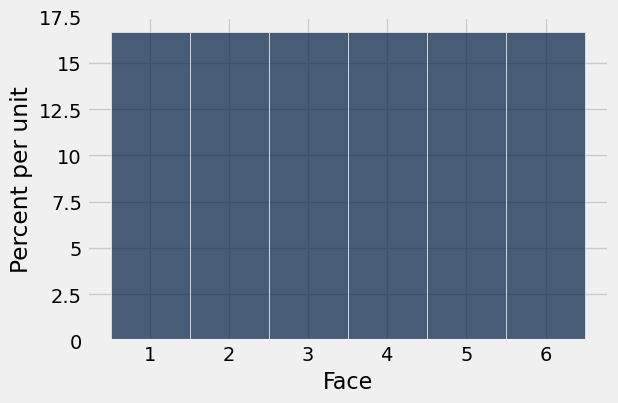

In [5]:
die.hist(bins=roll_bins)

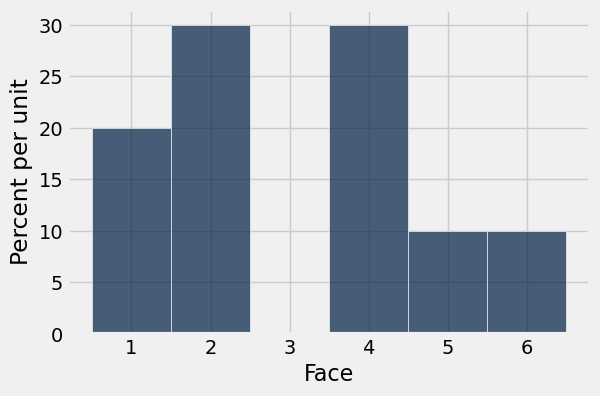

In [11]:
die.sample(10).hist(bins=roll_bins)

**Activity:** Simulate 1000 rolls of a die and plot the empirical distribution. What do you notice about this distribution compared to the 10 rolls. 

In [ ]:
...

**Activity:** Simulate 10000 rolls of a die and plot the empirical distribution. What do you notice?

In [ ]:
...

## Large Random Samples ##

In [13]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [ ]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [ ]:
min(united.column('Delay'))

In [ ]:
max(united.column('Delay'))

In [ ]:
np.average(united.column('Delay'))

**Activity:** Draw 10 samples from the `united` table and plot the distribution of delay times. What do you observe?

In [ ]:
...

**Activity:** Draw 1000 samples from the `united` table and plot the distribution of delay times. What do you observe?

In [ ]:
...

## Statistics

In [14]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [22]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

3.5

In [29]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

0.0

### Probability & Empirical Distributions of a Statistic

In [ ]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [ ]:
sample_median(10)

In [ ]:
num_simulations = 2000

In [ ]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

In [ ]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [ ]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

In [ ]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist(bins = np.arange(-0.5,7.5))

#### Empirical Distributions of a Statistic (Overlayed)

In [ ]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [ ]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

In [ ]:
sample_medians.hist(bins = np.arange(-5, 30))

## Sample Proportions

Say I have an unfair coin. With 40% chance of flipping heads and 60% chance of flipping tails.

In [ ]:
unfair_coin_proportions = make_array(0.4,0.6)
sample_proportions(100,unfair_coin_proportions)

## Swain vs. Alabama ##

In [ ]:
population_proportions = make_array(.26, .74)
population_proportions

In [ ]:
sample_proportions(100, population_proportions)

In [ ]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [ ]:
panel_proportion()

In [ ]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

In [ ]:
Table().with_column(
    'Number of Black Men on Panel of 100', panels
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

## Mendel and Pea Flowers ##

In [ ]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

In [ ]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

In [ ]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [ ]:
purple_flowers()

In [ ]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

In [ ]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [ ]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [ ]:
abs(observed_purples * 100 - 75)